## Import Packages

In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt

## Load Data and Algorithms 

In [2]:
from data import simulatedDataset
from algo import extensiveForm, multiBenders, singleBenders, regularizedDecomposition, levelMethod, trustRegion

## Compare Performence 

In [3]:
def compare(scenario_nums):
    """
    compare different algorithms performence with different number of scenarios
    """
    # init elapsed list
    elapseds = {}
    elapseds['ef'] = []
    elapseds['mb'] = []
    elapseds['sb'] = []
    elapseds['rd'] = []
    elapseds['lm'] = []
    elapseds['tr'] = []
    
    # init iter list
    iters = {}
    iters['mb'] = []
    iters['sb'] = []
    iters['rd'] = []
    iters['lm'] = []
    iters['tr'] = []
    
    
    for n in scenario_nums:
        print('Number of scenarios: ', n)
        dataset = simulatedDataset(n)
        
        print('  Running extensive form...')
        with hiddenPrints():
            _, elapsed = extensiveForm(dataset)
        elapseds['ef'].append(elapsed)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print('  Running multi-cut Benders...')
        with hiddenPrints():
            _, elapsed, noIters, noCuts, = multiBenders(dataset)
        elapseds['mb'].append(elapsed)
        iters['mb'].append(noIters)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print('  Running single-cut Benders...')
        with hiddenPrints():
            _, elapsed, noIters, noCuts, = singleBenders(dataset)
        elapseds['sb'].append(elapsed)
        iters['sb'].append(noIters)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print('  Running regularized decomposition...')
        with hiddenPrints():
            _, elapsed, noIters, noCuts, = regularizedDecomposition(dataset)
        elapseds['rd'].append(elapsed)
        iters['rd'].append(noIters)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print('  Running level method...')
        with hiddenPrints():
            _, elapsed, noIters, noCuts, = levelMethod(dataset)
        elapseds['lm'].append(elapsed)
        iters['lm'].append(noIters)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print('  Running trust region...')
        with hiddenPrints():
            _, elapsed, noIters, noCuts, = trustRegion(dataset)
        elapseds['tr'].append(elapsed)
        iters['tr'].append(noIters)
        print('  Time elapsed: {:.4f}'.format(elapsed))
        print()
        
        print()
        
    return elapseds, iters

In [4]:
class hiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [5]:
scenario_nums = [1,3,10,30,100,300,1000,3000]
elapseds, iters = compare(scenario_nums)

Number of scenarios:  1
  Running extensive form...
  Time elapsed: 0.0219

  Running multi-cut Benders...
  Time elapsed: 1.6756

  Running single-cut Benders...
  Time elapsed: 1.6036

  Running regularized decomposition...
  Time elapsed: 0.3740

  Running level method...
  Time elapsed: 1.3789

  Running trust region...
  Time elapsed: 0.3142


Number of scenarios:  3
  Running extensive form...
  Time elapsed: 0.0518

  Running multi-cut Benders...
  Time elapsed: 1.2353

  Running single-cut Benders...
  Time elapsed: 3.2041

  Running regularized decomposition...
  Time elapsed: 0.8704

  Running level method...
  Time elapsed: 2.6648

  Running trust region...
  Time elapsed: 2.0245


Number of scenarios:  10
  Running extensive form...
  Time elapsed: 0.1370

  Running multi-cut Benders...
  Time elapsed: 2.3680

  Running single-cut Benders...
  Time elapsed: 17.8770

  Running regularized decomposition...
  Time elapsed: 1.6026

  Running level method...
  Time elapsed: 8.32

## Visualize 

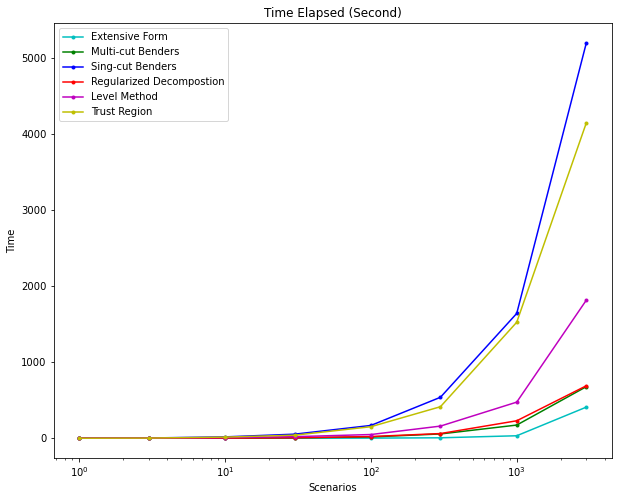

In [6]:
# time elpased
plt.figure(figsize=(10,8))
plt.plot(scenario_nums, elapseds['ef'], marker='.', color='c', label='Extensive Form')
plt.plot(scenario_nums, elapseds['mb'], marker='.', color='g', label='Multi-cut Benders')
plt.plot(scenario_nums, elapseds['sb'], marker='.', color='b', label='Sing-cut Benders')
plt.plot(scenario_nums, elapseds['rd'], marker='.', color='r', label='Regularized Decompostion')
plt.plot(scenario_nums, elapseds['lm'], marker='.', color='m', label='Level Method')
plt.plot(scenario_nums, elapseds['tr'], marker='.', color='y', label='Trust Region')
plt.legend()
plt.xlabel('Scenarios')
plt.ylabel('Time')
plt.xscale('log')
plt.title('Time Elapsed (Second)')
plt.show()

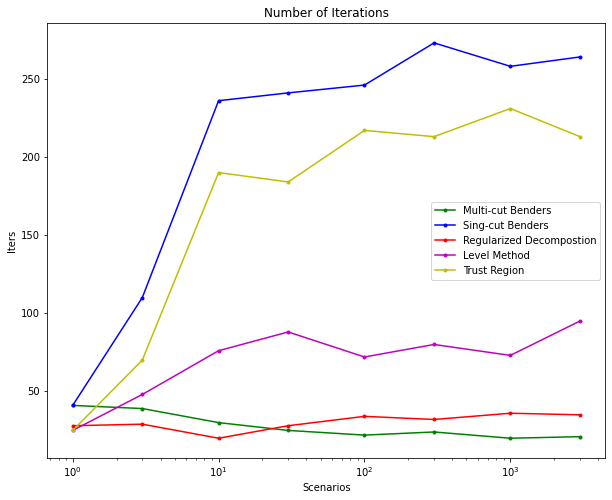

In [7]:
# time elpased
plt.figure(figsize=(10,8))
plt.plot(scenario_nums, iters['mb'], marker='.', color='g', label='Multi-cut Benders')
plt.plot(scenario_nums, iters['sb'], marker='.', color='b', label='Sing-cut Benders')
plt.plot(scenario_nums, iters['rd'], marker='.', color='r', label='Regularized Decompostion')
plt.plot(scenario_nums, iters['lm'], marker='.', color='m', label='Level Method')
plt.plot(scenario_nums, iters['tr'], marker='.', color='y', label='Trust Region')
plt.legend()
plt.xlabel('Scenarios')
plt.ylabel('Iters')
plt.xscale('log')
plt.title('Number of Iterations')
plt.show()